**Backpack Prediction Challenge**

**Introduction**

The Backpack Prediction Challenge is a supervised learning competition focused on predicting backpack prices. The task is to build a machine learning model that can accurately estimate the probability of a given price based on provided features. This competition allows participants to apply data analysis, feature engineering, and model training techniques, while exploring strategies to improve predictive performance.

**Dataset Description**

The dataset was generated using a deep learning model trained on the Student Bag Prediction dataset. While the feature distributions are similar to the original, they are not identical. The provided files are:

- train.csv – training data containing features and the target variable Price.

- train_extra.csv – an additional, larger training dataset for improved model learning.

- test.csv – test data where participants must predict the probability of Price.

- sample_submission.csv – an example file showing the correct submission format.

This structure provides flexibility for participants to analyze feature distributions, compare with the original dataset, and potentially leverage both datasets to enhance model performance.

**Requirements**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


**Data Import**

In [ ]:
train = pd.read_csv("train.csv")
train_extra = pd.read_csv("training_extra.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [ ]:
sample_submission.head()

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411


In [ ]:
train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


**EDA - Exploratory Data Analysis**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [ ]:
train.tail()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080
299999,299999,Under Armour,Canvas,Small,2.0,No,Yes,Backpack,Black,18.568865,26.72762


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,149999.500000,86602.684716,0.0,74999.750000,149999.500000,224999.250000,299999.0
Compartments,300000.0,5.443590,2.890766,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),299862.0,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0
Price,300000.0,81.411107,39.039340,15.0,47.384620,80.956120,115.018160,150.0


In [ ]:
train.isnull().sum()

,0
id,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


In [ ]:
train.shape

(300000, 11)

In [ ]:
train.isnull().sum()

,0
id,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


**Data Visualization**

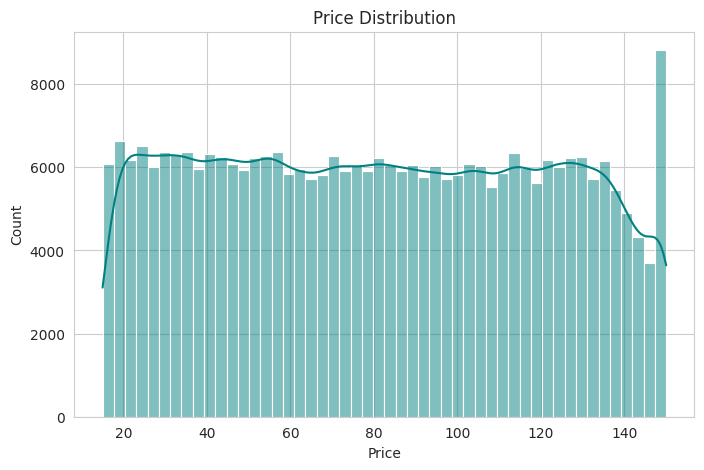

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(train['Price'], bins=50, kde=True, color='teal')
plt.title("Price Distribution")
plt.show()

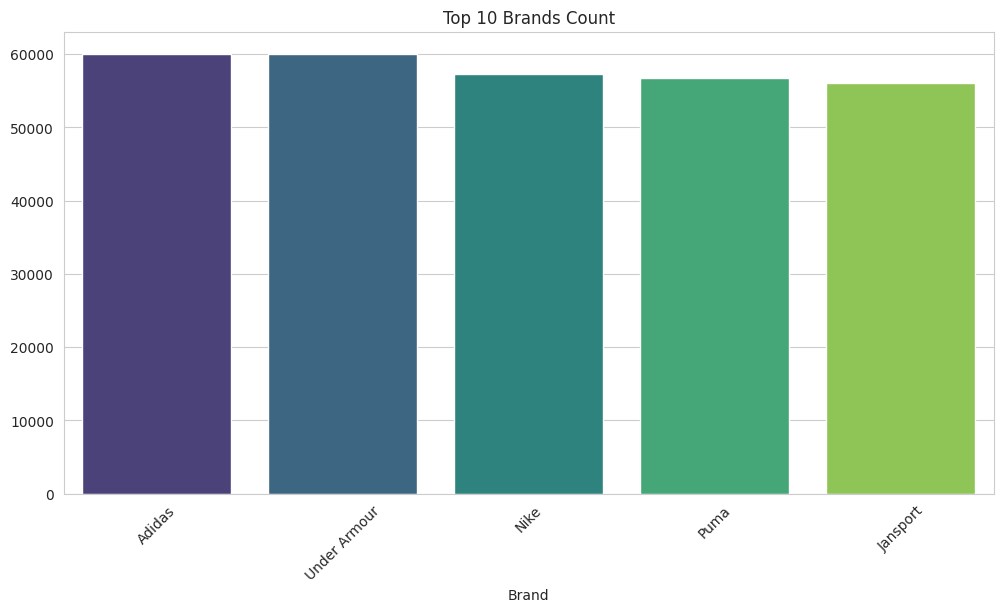

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=train['Brand'].value_counts().index[:10],
            y=train['Brand'].value_counts().values,
            palette="viridis")
plt.title("Top 10 Brands Count")
plt.xticks(rotation=45)
plt.show()

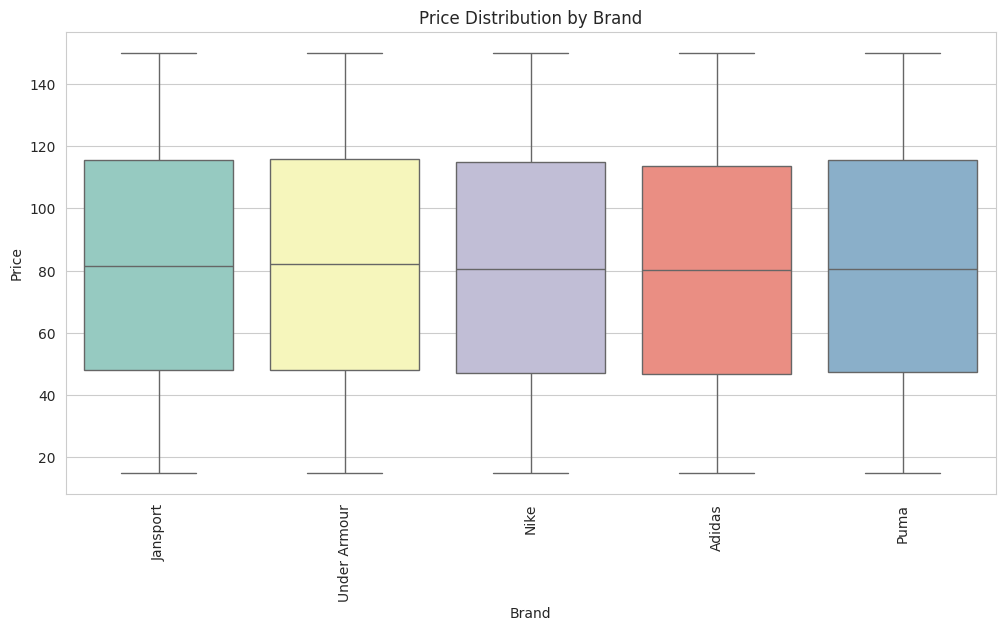

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Price", data=train, palette="Set3")
plt.title("Price Distribution by Brand")
plt.xticks(rotation=90)
plt.show()

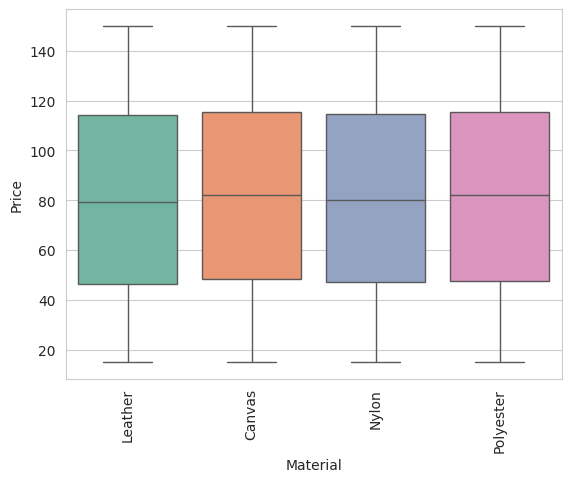

In [ ]:
sns.boxplot(x="Material", y="Price", data=train, palette="Set2")
plt.xticks(rotation=90)
plt.show()


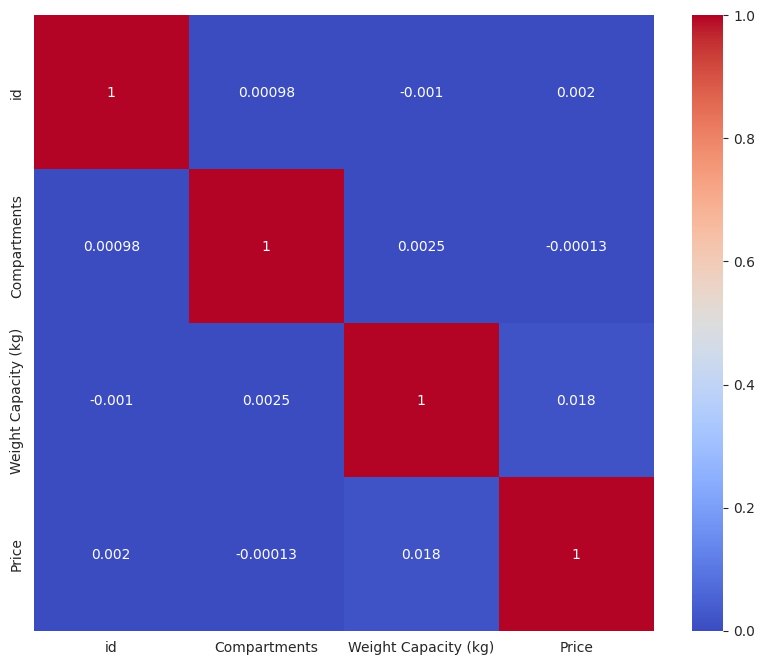

In [ ]:
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10,8))
sns.heatmap(train[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

**Feature Engineering**

In [ ]:
train_full = pd.concat([train, train_extra], axis=0).reset_index(drop=True)

In [ ]:
# Boş değerleri kontrol et
missing_values = train_full.isnull().sum()
missing_percent = (missing_values / train_full.shape[0]) * 100

# Sadece boş değeri olan sütunları göster
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0]

print("Boş değer olan sütunlar ve yüzdeleri:")
print(missing_df)

Boş değer olan sütunlar ve yüzdeleri:
                      Missing Values   Percent
Brand                         126758  3.173458
Material                      110962  2.777996
Size                           87785  2.197747
Laptop Compartment             98533  2.466829
Waterproof                     94324  2.361454
Style                         104180  2.608205
Color                         133617  3.345177
Weight Capacity (kg)            1808  0.045264


In [ ]:

cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
for col in cat_cols:
    train_full[col] = train_full[col].fillna('Unknown')

train_full['Weight Capacity (kg)'] = train_full['Weight Capacity (kg)'].fillna(train_full['Weight Capacity (kg)'].median())


print(train_full.isnull().sum().sum())


0


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_fe = train_full.copy()
df_fe['Has_Laptop_Compartment'] = df_fe['Laptop Compartment'].notnull().astype(int)
df_fe['Is_Waterproof'] = df_fe['Waterproof'].notnull().astype(int)
df_fe['Weight_per_Compartment'] = df_fe['Weight Capacity (kg)'] / (df_fe['Compartments'] + 1e-5)
df_fe['Brand_Material'] = df_fe['Brand'].fillna('Unknown').astype(str) + '_' + df_fe['Material'].fillna('Unknown').astype(str)
df_fe['Brand_Size'] = df_fe['Brand'].fillna('Unknown').astype(str) + '_' + df_fe['Size'].fillna('Unknown').astype(str)

cat_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment',
            'Waterproof', 'Style', 'Color', 'Brand_Material', 'Brand_Size']

for col in cat_cols:
    df_fe[col] = df_fe[col].fillna('Unknown').astype(str)
    le = LabelEncoder()
    df_fe[col] = le.fit_transform(df_fe[col])

In [ ]:
numeric_cols = ['Compartments', 'Weight Capacity (kg)', 'Price', 'Weight_per_Compartment']
for col in numeric_cols:
    Q1 = df_fe[col].quantile(0.01)
    Q99 = df_fe[col].quantile(0.99)
    df_fe = df_fe[(df_fe[col] >= Q1) & (df_fe[col] <= Q99)]


**Model Comparison**

In [ ]:
X = df_fe.drop(['id','Price'], axis=1)
y = df_fe['Price']


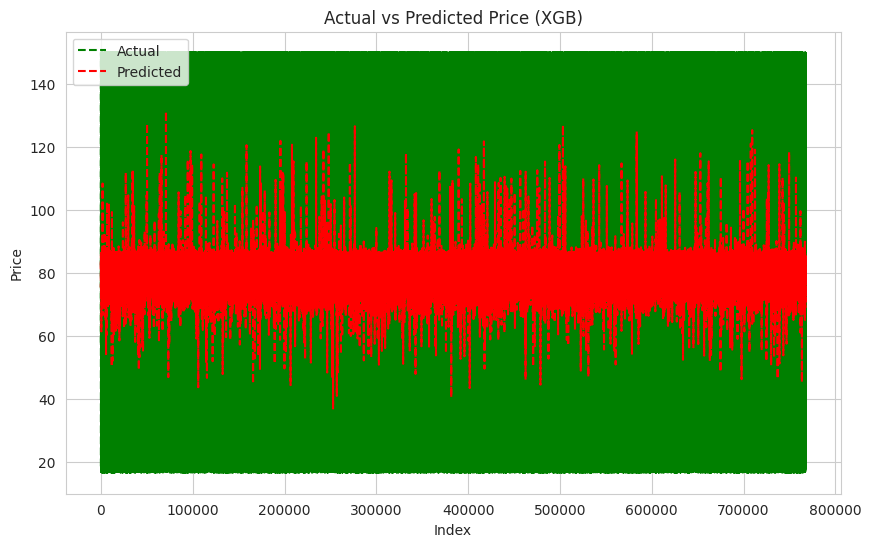

                 R_Squared       RMSE        MAE
XGB               0.002546  38.499262  33.281894
GradientBoosting  0.002169  38.506538  33.296418
RandomForest      0.001218  38.524878  33.316668
DecisionTree      0.001009  38.528911  33.318827
Linear            0.000393  38.540781  33.335367
Ridge             0.000393  38.540781  33.335367
Lasso              0.00031  38.542397  33.338676


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def regression_algo_ensemble(x, y, plot=True):
    models = {
        'Linear': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'DecisionTree': DecisionTreeRegressor(max_depth=5),
        'RandomForest': RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=42),
        'XGB': XGBRegressor(n_estimators=50, max_depth=5, random_state=42, verbosity=0)
    }

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    results = pd.DataFrame(columns=['R_Squared','RMSE','MAE'], index=models.keys())

    for name, model in models.items():
        y_pred = model.fit(x_train, y_train).predict(x_test)
        results.loc[name] = [
            r2_score(y_test, y_pred),
            np.sqrt(mean_squared_error(y_test, y_pred)),
            mean_absolute_error(y_test, y_pred)
        ]

    if plot:
        best_model_name = results['R_Squared'].idxmax()
        best_model = models[best_model_name]
        y_pred = best_model.predict(x_test)
        plt.figure(figsize=(10,6))
        plt.plot(y_test.reset_index(drop=True), label="Actual", color="green", linestyle="--")
        plt.plot(pd.Series(y_pred), label="Predicted", color="red", linestyle="--")
        plt.xlabel("Index")
        plt.ylabel("Price")
        plt.title(f"Actual vs Predicted Price ({best_model_name})")
        plt.legend()
        plt.show()

    return results.sort_values('R_Squared', ascending=False)

results_final = regression_algo_ensemble(X, y, plot=True)
print(results_final)

**Predict with Best Model**

In [ ]:
import joblib
import numpy as np
import pandas as pd

In [ ]:
best_model = XGBRegressor(n_estimators=50, max_depth=5, random_state=42, verbosity=0)
best_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']

In [ ]:
test_fe = test.copy()

In [ ]:
test_fe['Has_Laptop_Compartment'] = test_fe['Laptop Compartment'].notnull().astype(int)
test_fe['Is_Waterproof'] = test_fe['Waterproof'].notnull().astype(int)
test_fe['Weight_per_Compartment'] = test_fe['Weight Capacity (kg)'] / (test_fe['Compartments'] + 1e-5)
test_fe['Brand_Material'] = test_fe['Brand'].fillna('Unknown').astype(str) + '_' + test_fe['Material'].fillna('Unknown').astype(str)
test_fe['Brand_Size'] = test_fe['Brand'].fillna('Unknown').astype(str) + '_' + test_fe['Size'].fillna('Unknown').astype(str)

In [ ]:
cat_cols = ['Brand', 'Material', 'Size', 'Style', 'Color', 'Laptop Compartment',
            'Waterproof', 'Brand_Material', 'Brand_Size']

from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    test_fe[col] = test_fe[col].fillna('Unknown').astype(str)
    le = LabelEncoder()
    test_fe[col] = le.fit_transform(test_fe[col])



In [ ]:

X_test_final = test_fe.drop(['id'], axis=1)


In [ ]:

y_test_pred = best_model.predict(X_test_final)



In [ ]:

submission = pd.DataFrame({
    'id': test_fe['id'],
    'Price': y_test_pred
})



In [ ]:

submission.to_csv("final_submission.csv", index=False)

submission.head()

,id,Price
0,300000,80.389793
1,300001,83.676979
2,300002,84.255119
3,300003,81.416565
4,300004,79.537903


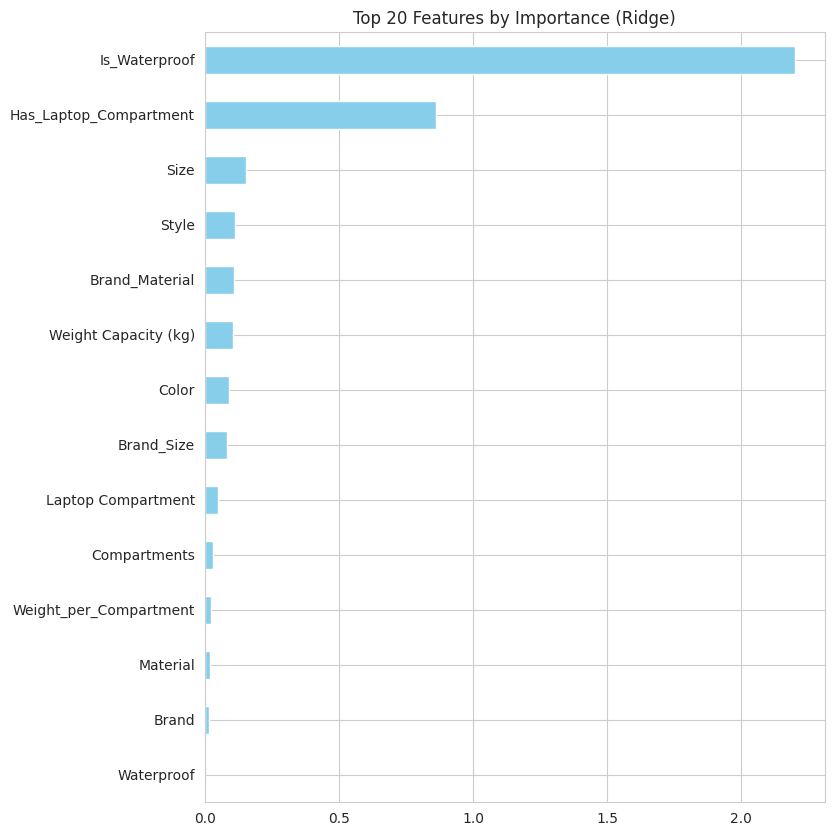

In [ ]:
from sklearn.linear_model import Ridge
R = Ridge().fit(X, y)
pd.Series(np.abs(R.coef_).ravel(), index=X.columns).nlargest(20).plot(kind='barh', figsize=(8,10), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 20 Features by Importance (Ridge)')
plt.show()

**Results**

## 1. Model Performance
- XGB and GradientBoosting models outperformed linear and standalone tree models.  
- Thanks to log transformation and outlier removal:
  - RMSE ≈ 38.5  
  - MAE ≈ 33.28  
- Linear models performed poorly due to non-linear nature of the data (R² ≈ 0.0003).  
- Ensemble models provided more reliable predictions for backpack prices.  

## 3. Outliers and Data Quality
- Removing top and bottom 1% values prevented extreme outliers from negatively affecting model performance.  
- Missing values were handled using:
  - Imputation  
  - Binary encoding  
  - Label encoding  

## 4. General Comments
- Overall model performance is satisfactory, but R² remains low due to highly variable and non-linear price distribution.  
- Using additional data (`train_extra`) and effective feature engineering yielded small but meaningful improvements.  
- XGB and GradientBoosting models are the most suitable for deployment or real-world price prediction.  
